In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
# json 파일 처리
import json

In [5]:
# 파일 존재 여부 확인용
import os

In [6]:
# Train 데이터에서 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [7]:
# 모델
from tensorflow import keras

In [8]:
# 랜덤숫자 생성
import random

# 변수 목록

In [9]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [10]:
train_dir_name = "./Dataset/Train-Test/Male/Train/"
test_dir_name = "./Dataset/Train-Test/Male/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [11]:
label_name = ['Ivy',
              'Mods',
              'Hippie',
              'Bold',
              'Hip-hop',
              'Metrosexual',
              'Sportive-Casual',
              'Normcore']

# 모델이 덮어쓰기되지 않도록 이름 잊지말고 바꿔주기

In [12]:
model_path = model_dir_name + 'fashion_classification_male_0128_04.keras'

# Train-Test 데이터 불러오기

In [13]:
x_train = []
y_train = []

for i in range(0, 12801):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    x_train.append(img_file)
    y_train.append(label_file)


    if len(y_train)%500 == 0: # 진행도 확인용
        print(str(len(y_train)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
8500개 파일 읽기 완료
9000개 파일 읽기 완료
9500개 파일 읽기 완료
10000개 파일 읽기 완료
10500개 파일 읽기 완료
11000개 파일 읽기 완료
11500개 파일 읽기 완료
12000개 파일 읽기 완료
12500개 파일 읽기 완료
Complete


In [14]:
x_test = []
y_test = []

for i in range(0, 3201):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    x_test.append(img_file)
    y_test.append(label_file)


    if len(y_test)%500 == 0: # 진행도 확인용
        print(str(len(y_test)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
Complete


# 학습을 위해 X,Y데이터 형식 변경

In [15]:
x_train = np.array(x_train)
x_train.shape

(12800, 200, 200, 3)

In [16]:
x_test = np.array(x_test)
x_test.shape

(3200, 200, 200, 3)

In [17]:
y_train_ori = y_train[:]
y_train = []

for item in y_train_ori:
  num = label_name.index(item['Labeling'])
  y_train.append(num)

print(y_train[0])

0


In [18]:
y_test_ori = y_test[:]
y_test = []

for item in y_test_ori:
  num = label_name.index(item['Labeling'])
  y_test.append(num)

print(y_test[0])

0


In [19]:
y_train = np.array(y_train)
y_train.shape

(12800,)

In [20]:
y_train = y_train.astype('uint8')
y_train.dtype

dtype('uint8')

In [21]:
y_test = np.array(y_test)
y_test.shape

(3200,)

In [22]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# Train 데이터에서 Validation 데이터 분리

In [23]:
x_train_ori = x_train[:]
y_train_ori = y_train[:]

x_train = []
y_train = []
x_val = []
y_val = []

x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_ori, test_size=0.25, stratify=y_train_ori)

In [24]:
x_train.shape

(9600, 200, 200, 3)

In [25]:
y_train.shape

(9600,)

In [26]:
x_val.shape

(3200, 200, 200, 3)

In [27]:
y_val.shape

(3200,)

# 학습 데이터 통계

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_train:
    label = label_name[item]
    if label not in label_count: # 해당 키가 없을 경우
        label_count[label] = 1
    else:
        label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Train Data Labeling Count")
plt.show()

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_val:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Validation Data Labeling Count")
plt.show()

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# 모델 생성

In [28]:
input_img = keras.layers.Input(shape=(img_height, img_width, 3))

conv1 = keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_img)
conv1 = keras.layers.Dropout(0.3)(conv1)
conv1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
pool1 = keras.layers.MaxPooling2D(2)(conv1)

conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
conv2 = keras.layers.Dropout(0.3)(conv2)
conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2)
pool2 = keras.layers.MaxPooling2D(2)(conv2)

conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
conv3 = keras.layers.Dropout(0.4)(conv3)
conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3)
pool3 = keras.layers.MaxPooling2D(2)(conv3)

conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool3)
conv4 = keras.layers.Dropout(0.4)(conv4)
conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
pool4 = keras.layers.MaxPooling2D(2)(conv4)

flat = keras.layers.Flatten()(pool4)

dense1 = keras.layers.Dense(1000, activation='relu')(flat)
dense1 = keras.layers.Dropout(0.4)(dense1)

dense2 = keras.layers.Dense(1000, activation='relu')(dense1)
dense2 = keras.layers.Dropout(0.4)(dense2)

dense3 = keras.layers.Dense(1000, activation='relu')(dense2)
dense3 = keras.layers.Dropout(0.4)(dense3)

dense4 = keras.layers.Dense(1000, activation='relu')(dense3)
dense4 = keras.layers.Dropout(0.4)(dense4)

dense5 = keras.layers.Dense(1000, activation='relu')(dense4)
dense5 = keras.layers.Dropout(0.4)(dense5)


# 모델이 총 8개의 패션 타입을 분류하므로 마지막 층은 n개의 뉴런 설정
output_label = keras.layers.Dense(8, activation='softmax', name='OutputLayer')(dense5)


fashion_model = keras.Model(input_img, output_label)
# adam learning_rate 기본값 0.001
adam = keras.optimizers.Adam(learning_rate=0.00006)
fashion_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [29]:
fashion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 200, 200, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                             

# 모델 학습

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [32]:
history = fashion_model.fit(x_train, y_train,
                            epochs=50, verbose=1,
                            validation_data=(x_val, y_val),
                            callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
300/300 [==============================] - 134s 448ms/step - loss: 2.0834 - sparse_categorical_accuracy: 0.1234 - val_loss: 2.0795 - val_sparse_categorical_accuracy: 0.1250
Epoch 2/50
300/300 [==============================] - 130s 435ms/step - loss: 2.0804 - sparse_categorical_accuracy: 0.1270 - val_loss: 2.0795 - val_sparse_categorical_accuracy: 0.1250
Epoch 3/50
300/300 [==============================] - 132s 441ms/step - loss: 2.0794 - sparse_categorical_accuracy: 0.1296 - val_loss: 2.0795 - val_sparse_categorical_accuracy: 0.1250
Epoch 4/50
300/300 [==============================] - 130s 434ms/step - loss: 2.0796 - sparse_categorical_accuracy: 0.1283 - val_loss: 2.0796 - val_sparse_categorical_accuracy: 0.1250
Epoch 5/50
300/300 [==============================] - 130s 435ms/step - loss: 2.0791 - sparse_categorical_accuracy: 0.1281 - val_loss: 2.0794 - val_sparse_categorical_accuracy: 0.1250
Epoch 6/50
300/300 [==============================] - 171s 572ms/step - loss: 2.

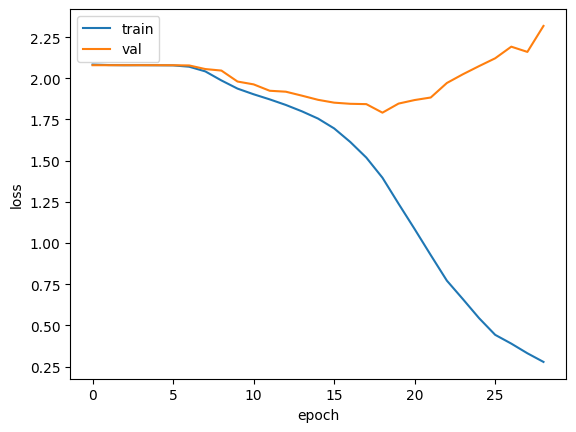

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

In [34]:
saved_model_path = model_dir_name + 'fashion_classification_male_0128_04.keras'

saved_model = keras.models.load_model(saved_model_path)

In [35]:
saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 200, 200, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                             

## 1개 Test 데이터 예측결과 확인

In [ ]:
num = random.randint(0, 3199)
print("Random Number : ", num)

preds = saved_model.predict(x_test[num:num+1])
type(preds)

In [ ]:
true_label = label_name[y_test[num]]
pred_label = label_name[np.argmax(preds)]

plt.imshow(x_test[num])
plt.show()

print('True Label : ', true_label)
print('Pred Label : ', pred_label)

## 전체 Test 데이터 정확도 확인

In [36]:
 saved_model.evaluate(x_test, y_test)

100/100 [==============================] - 8s 80ms/step - loss: 1.8014 - sparse_categorical_accuracy: 0.2875


[1.8013569116592407, 0.2874999940395355]